In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#use set option of pandas to display values in floating point format in place of exponential format
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
#import and view data
df = pd.read_csv('Superstore_Sample.csv',encoding='ISO-8859-1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.000,41.914
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.000,219.582
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.620,2,0.000,6.871
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.577,5,0.450,-383.031
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.368,2,0.200,2.516


In [7]:
#display column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [8]:
#display the shape of our dataset
df.shape

(9994, 21)

In [9]:
#get more information on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
#get null values
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [12]:
#check for duplicates
df.duplicated().any()

False

In [13]:
#get overall statistics of the data
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000,9994.000,9994.000,9994.000,9994.000,9994.000
mean,4997.500,55190.379,229.858,3.790,0.156,28.657
std,2885.164,32063.693,623.245,2.225,0.206,234.260
min,1.000,1040.000,0.444,1.000,0.000,-6599.978
25%,2499.250,23223.000,17.280,2.000,0.000,1.729
50%,4997.500,56430.500,54.490,3.000,0.200,8.666
75%,7495.750,90008.000,209.940,5.000,0.200,29.364
max,9994.000,99301.000,22638.480,14.000,0.800,8399.976


In [16]:
#drop unnecessary columns
df = df.drop(['Row ID', 'Order ID','Customer ID','Postal Code'],axis=1)
df.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Customer Name', 'Segment',
       'Country', 'City', 'State', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [17]:
#EDA
#Products Vs Category
cat_profit=df.groupby('Category')[('Profit')].sum()
cat_profit

Category
Furniture          18451.273
Office Supplies   122490.801
Technology        145454.948
Name: Profit, dtype: float64

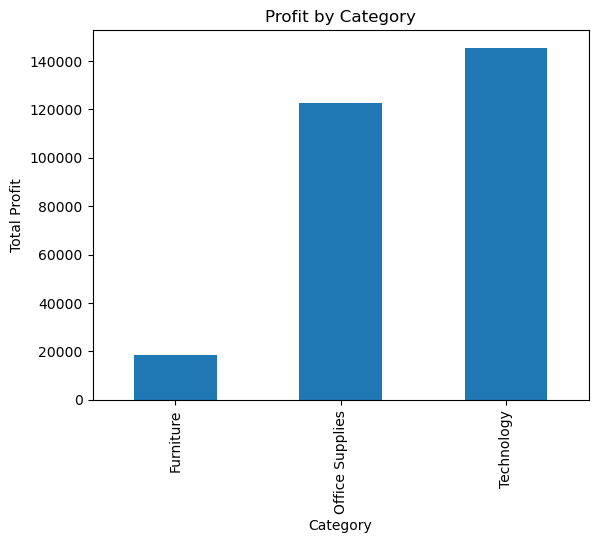

In [19]:
cat_profit=df.groupby('Category')[('Profit')].sum()
cat_profit.plot(kind='bar')
plt.title('Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit')
plt.show()

In [20]:
#region Vs Sales
reg_sales=df.groupby('Region')['Sales'].sum()
reg_sales

Region
Central   501239.891
East      678781.240
South     391721.905
West      725457.824
Name: Sales, dtype: float64

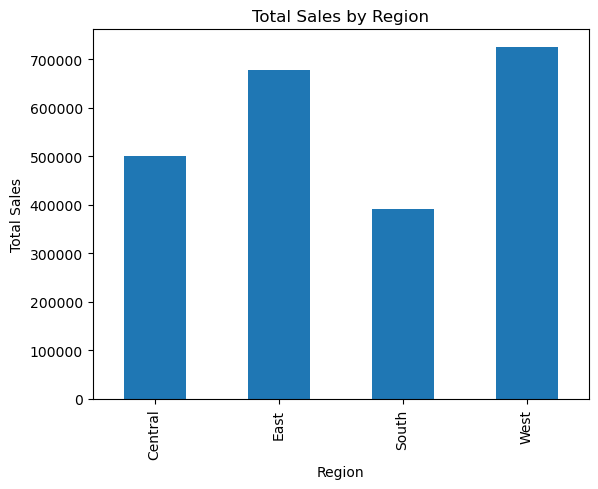

In [22]:
reg_sales=df.groupby('Region')[('Sales')].sum()
reg_sales.plot(kind='bar')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [21]:
#region Vs Profit
reg_profit=df.groupby('Region')['Profit'].sum()
reg_profit

Region
Central    39706.363
East       91522.780
South      46749.430
West      108418.449
Name: Profit, dtype: float64

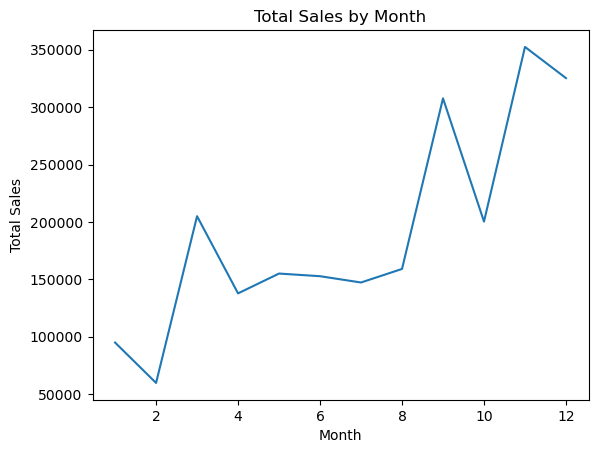

In [26]:
#extract month from Order date column
df['Order Month']=pd.DatetimeIndex(df['Order Date']).month
months_sales=df.groupby('Order Month')['Sales'].sum()
months_sales.plot(kind='line')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [28]:
#Products Vs Shipmode
total_orders_by_shippingmode=df.groupby('Ship Mode').size()

returned_orders_by_shippingmode=df[df['Profit']<0].groupby('Ship Mode').size()

returned_per_by_shippingmode=(returned_orders_by_shippingmode/total_orders_by_shippingmode)*100
print(returned_per_by_shippingmode)

Ship Mode
First Class      19.051
Same Day         18.048
Second Class     15.784
Standard Class   19.655
dtype: float64


In [30]:
#Profit Vs Day of the week
df['Order Day']=pd.DatetimeIndex(df['Order Date']).day_name()

day_profit=df.groupby('Order Day')['Profit'].sum()
day_profit

Order Day
Friday      46520.824
Monday      51511.115
Saturday    41277.620
Sunday      57129.512
Thursday    39683.751
Tuesday     35570.329
Wednesday   14703.871
Name: Profit, dtype: float64

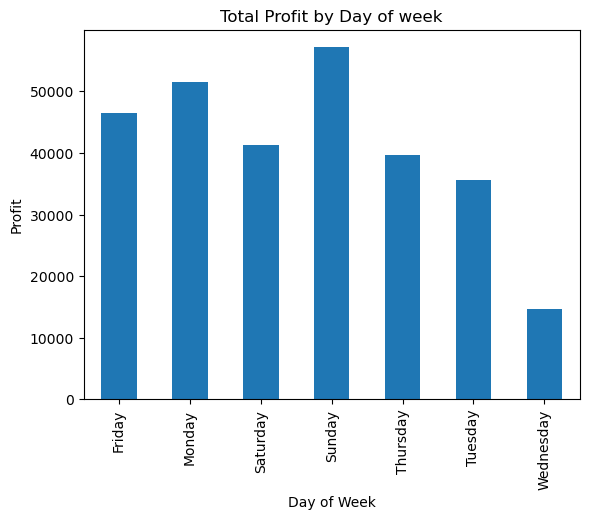

In [31]:
day_profit=df.groupby('Order Day')['Profit'].sum()
day_profit.plot(kind='bar')
plt.title('Total Profit by Day of week')
plt.xlabel('Day of Week')
plt.ylabel('Profit')
plt.show()

In [33]:
#Profit Vs Sub-Category
scat_profit=df.groupby('Sub-Category')[('Profit')].sum()
scat_profit

Sub-Category
Accessories    41936.636
Appliances     18138.005
Art             6527.787
Binders        30221.763
Bookcases      -3472.556
Chairs         26590.166
Copiers        55617.825
Envelopes       6964.177
Fasteners        949.518
Furnishings    13059.144
Labels          5546.254
Machines        3384.757
Paper          34053.569
Phones         44515.731
Storage        21278.826
Supplies       -1189.100
Tables        -17725.481
Name: Profit, dtype: float64